In [2]:
from zipfile import ZipFile
from google.colab import files

# Upload
uploaded = files.upload()

# Extract the correct file
with ZipFile("netflix_titles.csv.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Check contents
import os
os.listdir(".")


Saving netflix_titles.csv.zip to netflix_titles.csv (1).zip


['.config',
 'netflix_titles.csv',
 'netflix_titles.csv (1).zip',
 'netflix_titles.csv.zip',
 'sample_data']

In [3]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")

# See first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Shape of dataset
print("Rows:", df.shape[0], "Columns:", df.shape[1])

# Column names and types
print(df.info())

# Count missing values
print(df.isnull().sum())


Rows: 8807 Columns: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in     

/tmp/ipython-input-599675274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


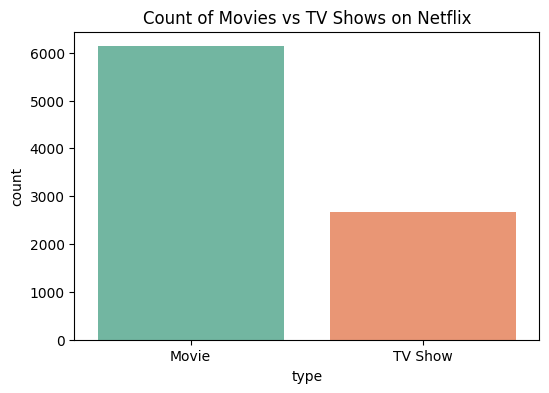

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Count of Movies vs TV Shows on Netflix")
plt.show()


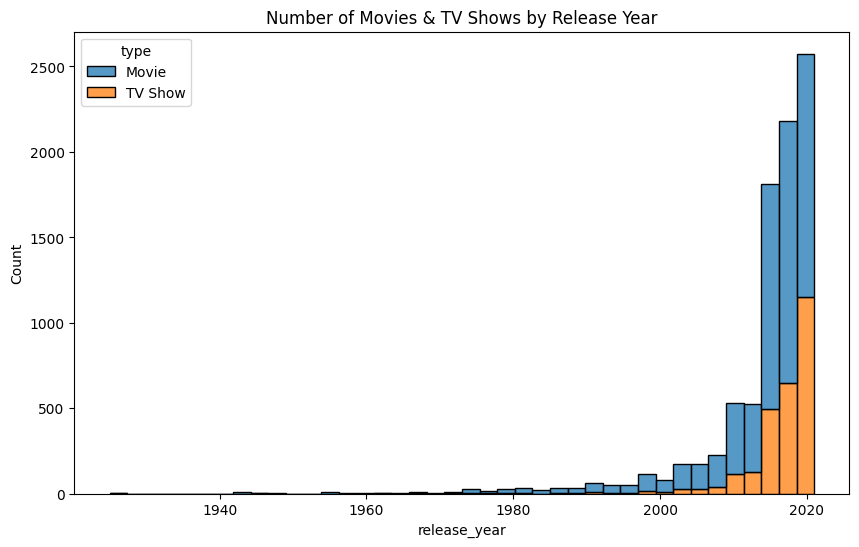

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="release_year", hue="type", multiple="stack", bins=40)
plt.title("Number of Movies & TV Shows by Release Year")
plt.show()


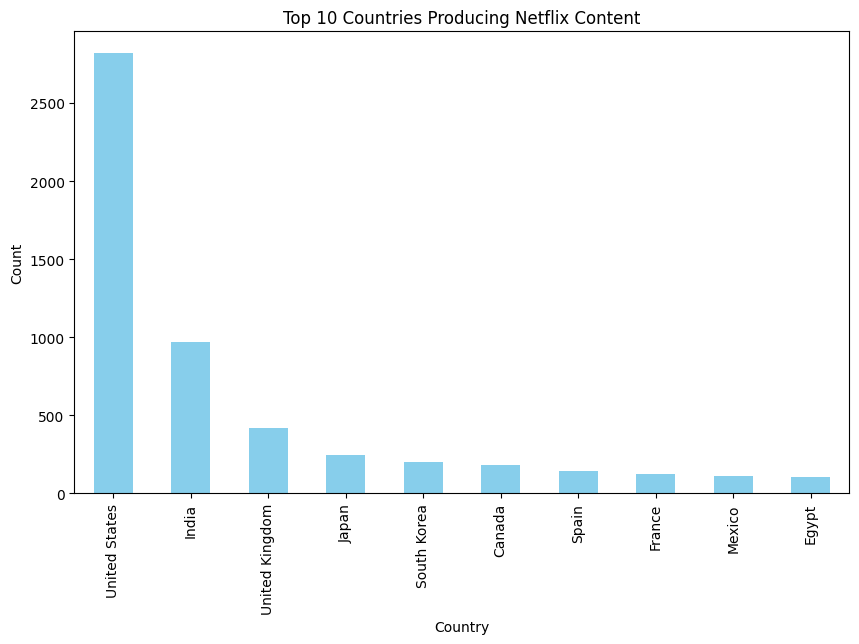

In [7]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


1) Movies vs TV Shows count
Observation: Netflix has far more movies than TV shows in its catalog. This shows Netflix leans toward movies, though TV shows have been growing.

2) Number of Movies & TV Shows by Release Year
Observation: Most Netflix content is from the 2000s onwards, especially after 2010. Very few older titles are included. This shows Netflix focuses on modern content.

3) Top 10 Countries Producing Content
Observation: The United States dominates Netflix content production, followed by India, United Kingdom, and other countries. This highlights Netflix’s global reach, but also its heavy reliance on U.S. content.